# Forex Prediction-02 (Basic Sequence Models)

What's new:

1- Summarizing app. This is Basic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2025-05-07 12:36:48.748720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

df = pd.read_csv('../datasets/XAGUSD-H1-rates.csv', sep='\t').dropna()

# Scale selected features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>']])

# Prepare sequences
def create_sequences(features, target, window, horizon):
    X, y = [], []
    for i in range(window, len(features) - horizon):
        X.append(features[i - window:i])
        y.append(target[i:i + horizon])
    return np.array(X), np.array(y)

WINDOW_SIZE = 30
FORECAST_HORIZON = 10
X, y = create_sequences(scaled, df['<CLOSE>'].values, WINDOW_SIZE, FORECAST_HORIZON)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Build basic LSTM model
model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(FORECAST_HORIZON)
])
model.compile(optimizer='adam', loss='mse')


# Train
model.fit(X_train, y_train, epochs=1, verbose=1)

# Predict and plot
y_pred = model.predict(X_test)

/home/saeed/repozitories/machine-learning/forex-prediction/envs/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-07 12:36:54.000131: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26420400 exceeds 10% of free system memory.


1377/1377 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 133.4469
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


# plot section

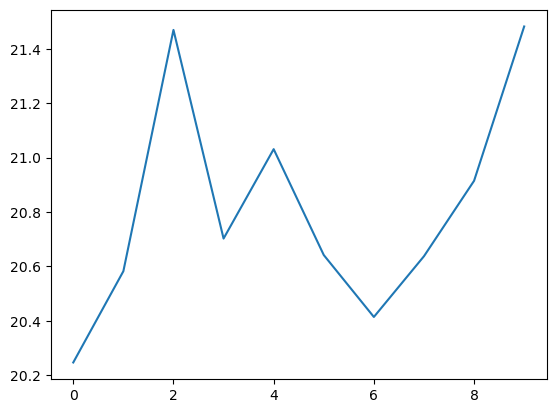

In [3]:
plt.plot(range(10), y_pred[0])
plt.show()


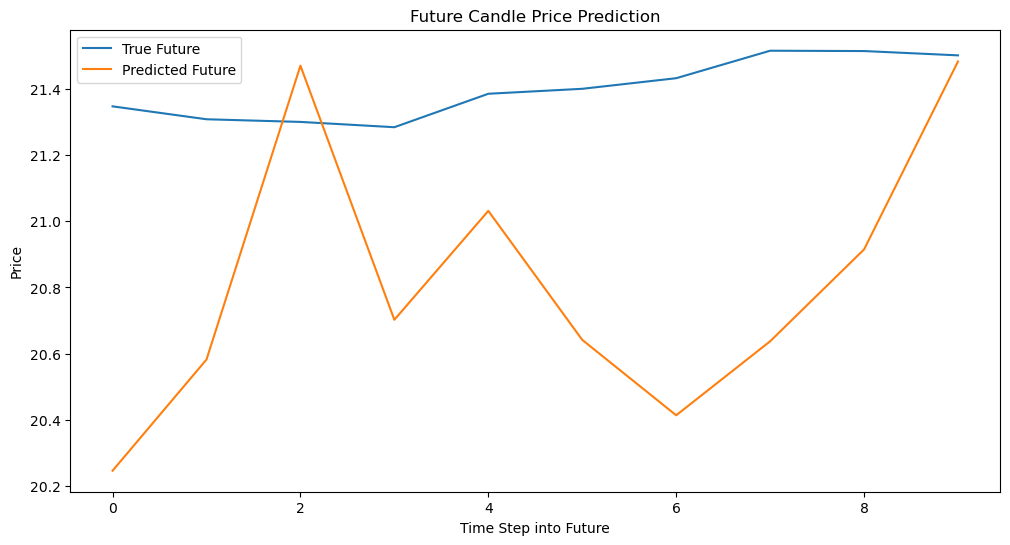

In [4]:
# Plot first prediction vs true future prices
plt.figure(figsize=(12,6))
plt.plot(range(FORECAST_HORIZON), y_test[0], label='True Future')
plt.plot(range(FORECAST_HORIZON), y_pred[0], label='Predicted Future')
plt.title('Future Candle Price Prediction')
plt.xlabel('Time Step into Future')
plt.ylabel('Price')
plt.legend()
plt.show()